In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline    
# matplotlib inline is for visuaizing in the notebook itself

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

from sklearn.metrics import r2_score

# for OLS ordinary least square
import statsmodels.api as sm

In [105]:
df=pd.read_csv('Dataset/height_weight.csv')

In [106]:
df.head()

,Height,Weight
0,120,45
1,135,58
2,123,48
3,145,60
4,160,70


Text(0, 0.5, 'Weight')

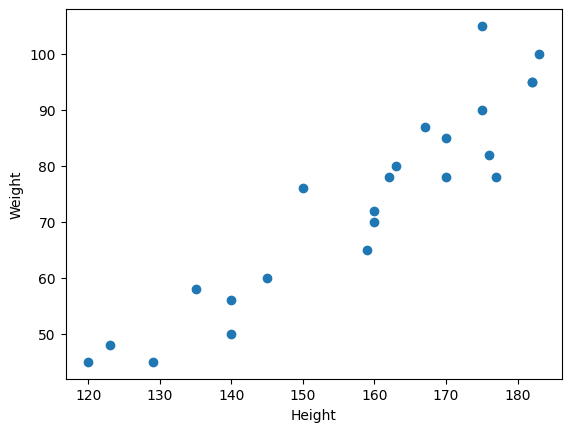

In [107]:
## Scatter
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")

In [108]:
## find correlation
df.corr()

,Height,Weight
Height,1.000000,0.931142
Weight,0.931142,1.000000


In [109]:
## Seaborn
import seaborn as sns

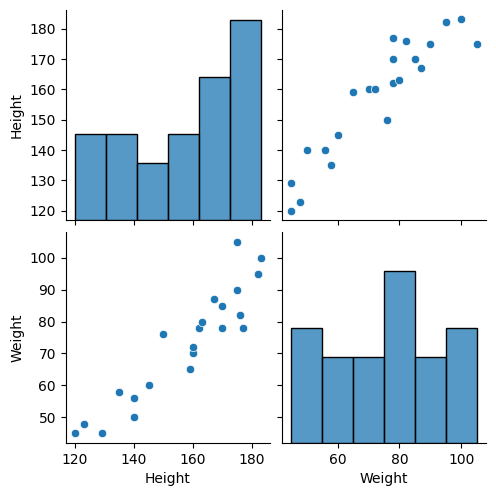

In [110]:
sns.pairplot(df)

In [111]:
## independent Feature and Dependent feature
X = df['Height'] 
print(type(X))
print(np.array(X).shape)
X = df[['Height']]  ## independent feature should be data frame or 2-D array
print(type(X))
print(np.array(X).shape)

y=df['Weight'] ## dependent feature should be in series or 1-D array

<class 'pandas.core.series.Series'>
(23,)
<class 'pandas.core.frame.DataFrame'>
(23, 1)


In [112]:
## split train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
# randomly one can select train and test datapoints, 
# if random_state is given it will choose the same train and test datapoints for everyone

In [113]:
print(X_train.shape)
print(y_train.shape)

(17, 1)
(17,)


In [114]:
## Standardization    
# We do this because for bigger values it will take time to find global minima
# We take each independent feature and apply 'Z_Score' formula. 
# After applying formula our mean converts to 0 and 
#   standard deviation converts to 1

scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)

For standardizeing training dataset we use fit_transform and in test dataset we use transform, because the same mean and standard deviation used for training data is used in test data aslo. If fit_transform is used there is a chance of data leakage(ie. model get idea of both train and test data)

In [115]:
X_test_stand = scaler.transform(X_test)

In [116]:
# Apply simple linear regression

regression = LinearRegression(n_jobs=-1)
# njobs utlize number of core processors

In [117]:
regression.fit(X_train_stand,y_train)

LinearRegression(n_jobs=-1)

In [118]:
# print the coefficient beta_1, here there is only 1 independent feature
print("Coefficent or slope : ",regression.coef_)
# print intercept
print("Intercept : ",regression.intercept_)

Coefficent or slope :  [15.84018607]
Intercept :  72.47058823529412


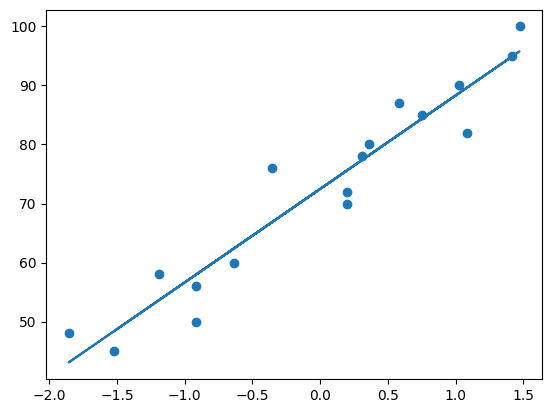

In [119]:
## plot Training data plot best fit line
plt.scatter(X_train_stand,y_train)
plt.plot(X_train_stand,regression.predict(X_train_stand))

In [120]:
## Prediction for test data
y_pred = regression.predict(X_test_stand)

In [121]:
print(y_test)
print(y_pred)

15     78
9      78
0      45
8      95
17     65
12    105
Name: Weight, dtype: int64
[90.51011585 84.35910214 40.42328989 94.90369708 74.69322344 88.75268336]


In [122]:
print(X_train)
print("---")
print(y_train)
print("---")
print(X_test)
print("---")
print(y_test)
print("---")
print(y_pred)

    Height
1      135
13     183
5      162
2      123
11     182
20     129
3      145
4      160
18     150
16     140
21     140
22     160
7      175
10     176
14     170
19     167
6      163
---
1      58
13    100
5      78
2      48
11     95
20     45
3      60
4      70
18     76
16     50
21     56
22     72
7      90
10     82
14     85
19     87
6      80
Name: Weight, dtype: int64
---
    Height
15     177
9      170
0      120
8      182
17     159
12     175
---
15     78
9      78
0      45
8      95
17     65
12    105
Name: Weight, dtype: int64
---
[90.51011585 84.35910214 40.42328989 94.90369708 74.69322344 88.75268336]


In [123]:
## Performance Metrices
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
rmsee = np.sqrt(mse)
print("mse: ", mse," mae: ",mae," rmse: ",rmse, " another rmse method: ",rmsee)

mse:  95.97176782989375  mae:  8.247128517477355  rmse:  9.796518148296045  another rmse method:  9.796518148296045


In [124]:
## R_Square
score = r2_score(y_test,y_pred)
print(score)

0.7469247259100369


In [125]:
## Adjusted R_Square
print("N = no. of datapoints: ",len(y_test))
print(X_test_stand.shape)
print("P = no. of independent feature: ",X_test_stand.shape[1])
adj_r_square = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_stand.shape[1]-1)
adj_r_square

N = no. of datapoints:  6
(6, 1)
P = no. of independent feature:  1


0.6836559073875461

In [126]:
## OLS linear regression

model = sm.OLS(y_train,X_train_stand).fit()

In [127]:
prediction = model.predict(X_test_stand)
print(prediction)

[ 18.03952762  11.8885139  -32.04729835  22.43310884   2.22263521
  16.28209513]


In [128]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):             -0.014
Method:                 Least Squares   F-statistic:                             0.7613
Date:                Tue, 25 Jun 2024   Prob (F-statistic):                       0.396
Time:                        00:31:26   Log-Likelihood:                         -96.971
No. Observations:                  17   AIC:                                      195.9
Df Residuals:                      16   BIC:                                      196.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/kali/JosephKB/ML_NLP/KrishNaikUdemy/ML_NLP_Learning_Codes/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


IN OLS and above cell 15 we get same coeffcient as "15.8"

In [129]:
## Prediction of new data

print(regression.predict([[72]]))

# we need to do standardaisation

regression.predict(scaler.transform([[72]]))

[1212.96398521]


/home/kali/JosephKB/ML_NLP/KrishNaikUdemy/ML_NLP_Learning_Codes/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-1.75508987])